In [5]:
import torch

In [6]:
confusion_matrix = torch.load("./gradcam_perturb_moco/79301_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load79196_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue_dev_train_loader_confusion_matrix.pickle")
acc_f1 = 0
acc_recall = 0
acc_precision = 0
for i in range(confusion_matrix.shape[0]):
  recall = confusion_matrix[i, i] / confusion_matrix[i].sum()
  precision = confusion_matrix[i, i] / confusion_matrix[:, i].sum()

  acc_f1 += 2 / (1 / precision + 1 / recall)
  acc_recall += recall
  acc_precision += precision

print(f"F1: {acc_f1 / confusion_matrix.shape[0]}, precision: {acc_precision / confusion_matrix.shape[0]}, recall: {acc_recall / confusion_matrix.shape[0]}")




F1: 0.8361279964447021, precision: 0.8321565389633179, recall: 0.8443987369537354


avg F1: 0.8368660807609558, preci: 0.8506423830986023, recall: 0.8459517359733582
avg F1: 0.846764087677002, preci: 0.8437185287475586, recall: 0.8521729111671448


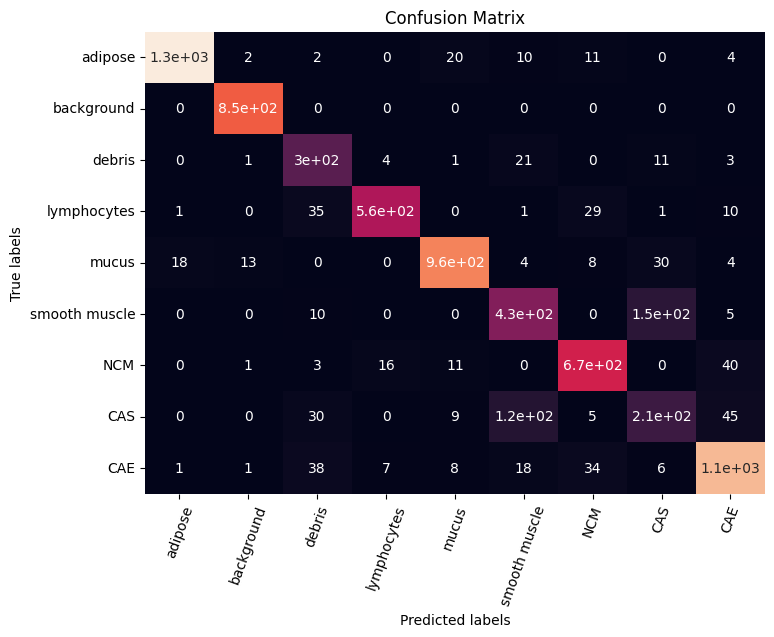

\toprule
 & adipose & background & debris \\
\hline
Precision & $0.9847$ ($-0.0035$) & $0.9792$ ($+0.0307$) & $0.7163$ ($+0.0526$) \\
Recall & $0.9634$ ($-0.0079$) & $1.0000$ ($+0.0006$) & $0.8791$ ($+0.0044$) \\
\toprule
 & lymphocytes & mucus & smooth muscle \\
\hline
Precision & $0.9538$ ($+0.0931$) & $0.9512$ ($-0.0244$) & $0.7041$ ($-0.0789$) \\
Recall & $0.8785$ ($-0.1088$) & $0.9254$ ($-0.0039$) & $0.7208$ ($-0.0694$) \\
\toprule
 & NCM & CAS & CAE \\
\hline
Precision & $0.8846$ ($-0.0654$) & $0.5099$ ($-0.1193$) & $0.9096$ ($+0.0528$) \\
Recall & $0.9038$ ($+0.0854$) & $0.4905$ ($+0.1726$) & $0.9081$ ($-0.0171$) \\


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def single_precision(cm, i):
    preci = cm[i, i].item() / cm[:, i].sum().item()
    return preci

def single_recall(cm, i):
    recall = cm[i, i].item() / cm[i].sum().item()
    return recall

def show_single_precision(acc_preci, base_preci, i):
    diff = acc_preci.mean(dim=0)[i].item() - base_preci.mean(dim=0)[i].item()
    # return '${:.4f}$'.format(
    #     acc_preci.mean(dim=0)[i].item()
    #     )
    return '${:.4f}$ {}'.format(
        acc_preci.mean(dim=0)[i].item(),
        '($+{:.4f}$)'.format(diff) if diff >= 0 else '(${:.4f}$)'.format(diff)
        )

def show_single_recall(acc_recall, base_recall, i):
    diff = acc_recall.mean(dim=0)[i].item() - base_recall.mean(dim=0)[i].item()
    # return '${:.4f}$'.format(
    #     acc_recall.mean(dim=0)[i].item()
    #     )
    return '${:.4f}$ {}'.format(
        acc_recall.mean(dim=0)[i].item(),
        '($+{:.4f}$)'.format(diff) if diff >= 0 else '(${:.4f}$)'.format(diff)
        )

def multi_metric(names):
  acc_preci = []
  acc_recall = []
  acc_cm = torch.zeros((9, 9))
  for name in names:
      cm = torch.load(name)
      acc_cm += cm
      acc_preci.append([])
      acc_recall.append([])
      for i in range(9):
          acc_preci[-1].append(single_precision(cm, i))
          acc_recall[-1].append(single_recall(cm, i))
  acc_preci = torch.tensor(acc_preci)
  acc_recall = torch.tensor(acc_recall)
  print(f"avg F1: {(2 / (1 / acc_preci + 1 / acc_recall)).mean()}, preci: {acc_preci.mean()}, recall: {acc_recall.mean()}")
  return acc_cm / len(names), acc_preci, acc_recall

labels = ['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle', 'NCM', 'CAS', 'CAE']

# # pretrain set
# base_names = [
#     "./supervised/73909_epoch20_shuffledFalse_load73656_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse_confusion_matrix.pickle",
#     "./supervised/73928_epoch20_shuffledFalse_load73657_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse_confusion_matrix.pickle"
# ]
# dev set
base_names = [
    "./supervised/74649_epoch160_shuffledFalse_load_lr0.01-0.01_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse_confusion_matrix.pickle",
    "./supervised/74069_epoch160_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse_confusion_matrix.pickle",
]

names = [
    # "./moco/76305_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76227_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue_dev_train_loader_confusion_matrix.pickle",
    
    # "./moco/75873_epochs0_early-stopTrue_supervisedTrue_shuffledFalse_load75755_lr-pretrain1.0-1.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue_pretrain_loader_confusion_matrix.pickle",
    # # "./moco/75349_epochs20_supervisedTrue_shuffledFalse_load75046_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue_pretrain_loader_confusion_matrix.pickle"

    "./gradcam_perturb_moco/79429_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load79301_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue_dev_train_loader_confusion_matrix.pickle"
]

base_cm, base_preci, base_recall = multi_metric(base_names)
acc_cm, acc_preci, acc_recall = multi_metric(names)

# Plotting the confusion matrix
fig, ax= plt.subplots(1, 1, figsize=(8,6))
sns.heatmap(acc_cm, annot=True, ax = ax, cbar=False); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0)
plt.show()

print("\\toprule")
print(" & adipose & background & debris \\\\")
print("\\hline")
print(f"Precision{''.join([' & ' + show_single_precision(acc_preci, base_preci, i) for i in range(3)])} \\\\")
print(f"Recall{''.join([' & ' + show_single_recall(acc_recall, base_recall, i) for i in range(3)])} \\\\")
print("\\toprule")
print(" & lymphocytes & mucus & smooth muscle \\\\")
print("\\hline")
print(f"Precision{''.join([' & ' + show_single_precision(acc_preci, base_preci, i) for i in range(3, 6)])} \\\\")
print(f"Recall{''.join([' & ' + show_single_recall(acc_recall, base_recall, i) for i in range(3, 6)])} \\\\")
print("\\toprule")
print(" & NCM & CAS & CAE \\\\")
print("\\hline")
print(f"Precision{''.join([' & ' + show_single_precision(acc_preci, base_preci, i) for i in range(6, 9)])} \\\\")
print(f"Recall{''.join([' & ' + show_single_recall(acc_recall, base_recall, i) for i in range(6, 9)])} \\\\")



In [60]:
acc_preci.shape

torch.Size([2, 9])